In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [44]:
def get_drop_latency(wm, latency):
    wm = pd.read_csv(wm)
    latency = pd.read_csv(latency)
    wm.columns = ["watermark", "ts"]
    drop1 = wm[-1:].iloc[0]['watermark']/wm[-1:].iloc[0]['ts']
#     print(wm[-1:], drop1)
    drop2 = wm[-2:-1].iloc[0]['watermark']/wm[-2:-1].iloc[0]['ts']
    print(wm[-2:-1], drop2)
    latency.columns = ["watermark", "window_end"]
    latency = latency.set_index("watermark")
    wm = wm.set_index("watermark")
    res = latency.join(wm,  how='inner')
    res = res.reset_index(drop = True)
    
    all_wait = 0
    for index, row in res.iterrows():
        all_wait += row['ts'] - row['window_end']
        if row['ts'] - row['window_end'] > 300000:
            row['ts']  = row['window_end'] + 5000
    avg_wait = all_wait/len(res)
    print(avg_wait)
    return drop1, drop2, avg_wait, res

In [68]:
dis = pd.read_csv("disorder.csv")
dis.columns = ["window_end", "count", "all"]

In [69]:
_, _, _, res = get_drop_latency("water.csv", "timelatency.csv")

       watermark     ts
26973       9478  71378 0.13278601249684777
33647.08935219658


0 60

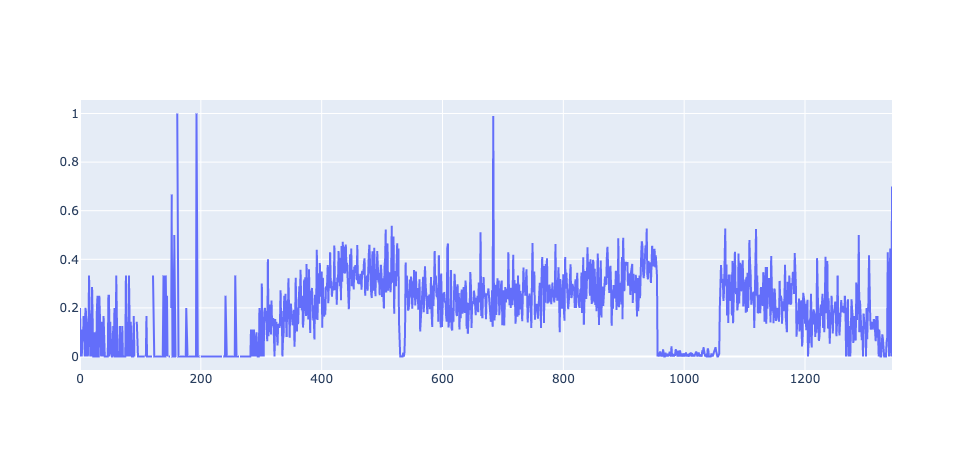

In [56]:
import plotly.graph_objects as go
line1 = go.Scatter(x=dis.index,y=dis['count']/dis['all'], name="source")
fig = go.Figure([line1])
fig.show()

AD

In [55]:
_, _, _, res = get_drop_latency("water.csv", "timelatency.csv")

       watermark     ts
27277      18316  71378 0.256605676819188
10332.201636904761


0 60

In [58]:
_, _, _, res = get_drop_latency("water.csv", "timelatency.csv")

       watermark     ts
37049      34312  71378 0.4807083415057861
9534.754122938532


1000 60

In [61]:
_, _, _, res = get_drop_latency("water.csv", "timelatency.csv")

       watermark     ts
37049      20469  71378 0.2867690324749923
10614.823088455772


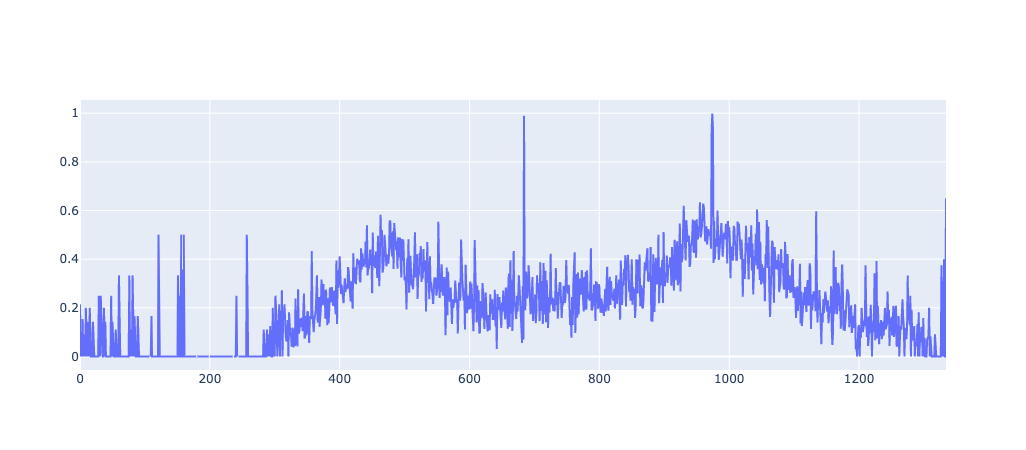

In [27]:
dis = pd.read_csv("disorder.csv")
dis.columns = ["window_end", "count", "all"]
import plotly.graph_objects as go
line1 = go.Scatter(x=dis.index,y=dis['count']/dis['all'], name="source")
fig = go.Figure([line1])
fig.show()

1000 60

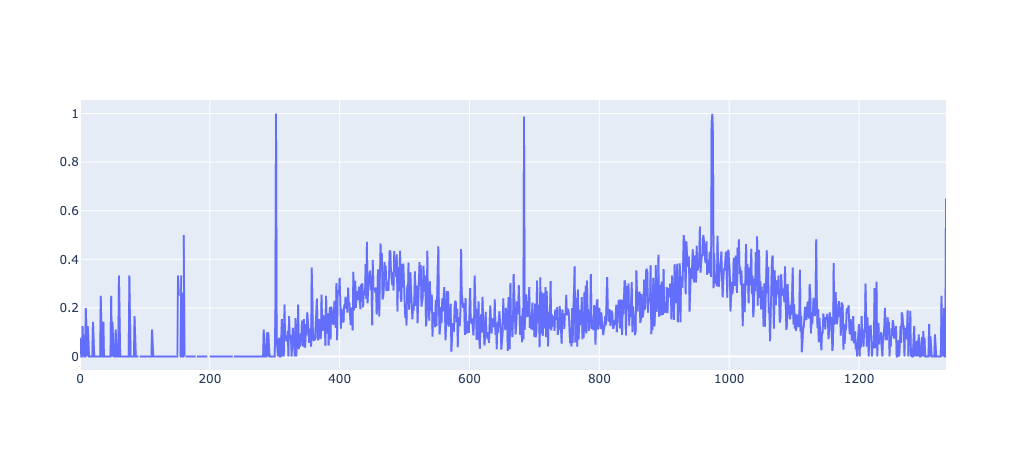

In [29]:
dis = pd.read_csv("disorder.csv")
dis.columns = ["window_end", "count", "all"]
import plotly.graph_objects as go
line1 = go.Scatter(x=dis.index,y=dis['count']/dis['all'], name="source")
fig = go.Figure([line1])
fig.show()

1500 60

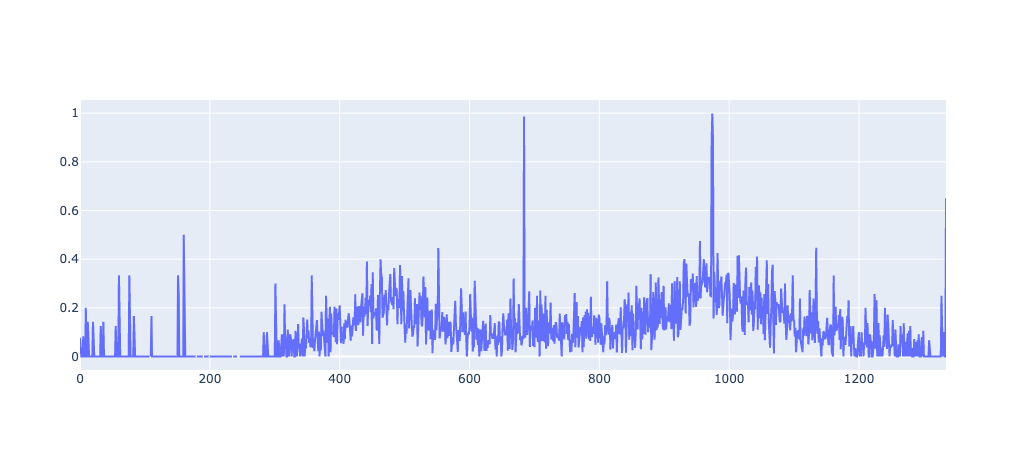

In [30]:
dis = pd.read_csv("disorder.csv")
dis.columns = ["window_end", "count", "all"]
import plotly.graph_objects as go
line1 = go.Scatter(x=dis.index,y=dis['count']/dis['all'], name="source")
fig = go.Figure([line1])
fig.show()

2000 60

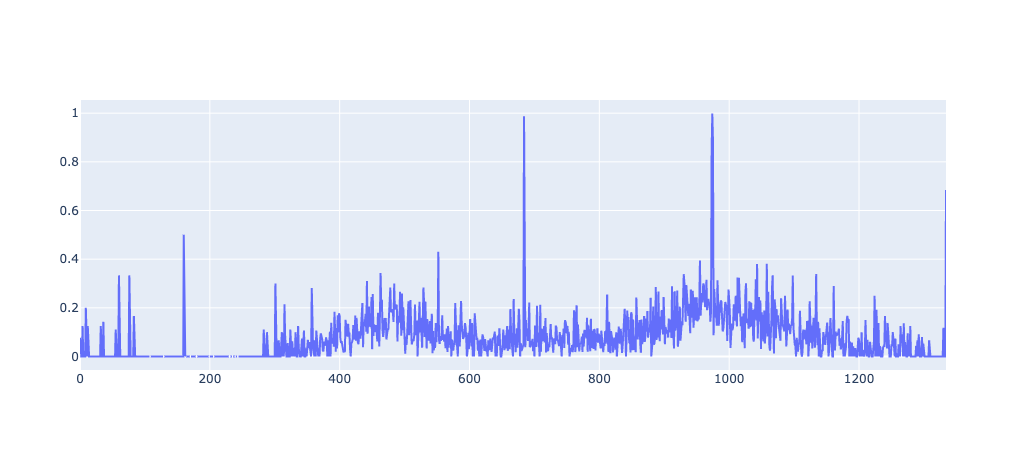

In [32]:
dis = pd.read_csv("disorder.csv")
dis.columns = ["window_end", "count", "all"]
import plotly.graph_objects as go
line1 = go.Scatter(x=dis.index,y=dis['count']/dis['all'], name="source")
fig = go.Figure([line1])
fig.show()

In [41]:
_, _, _, res = get_drop_latency("water.csv", "timelatency.csv")

       watermark     ts
37049      12688  71378 0.1777578525596122
11731.815592203899


10000ms 60s